<h1 align="center">📊 TRỰC QUAN HOÁ DỮ LIỆU</h1>


<h1 align="center">📖 Mục lục</h1>

[I. Tiền xử lý bổ sung](#i)

[II.Phân tích vấn đề và trực quan](#ii)

- [1. Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm](#ii1)

- [2. Chủ đề 2: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào?](#ii2)

    - [2.1: Cách thời gian ngủ tác động đến sức khỏe tinh thần](#ii2-1)

    - [2.2: Thói quen ăn uống tác động đến sức khỏe tinh thần như thế nào?](#ii2-2)

    - [2.3: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào](#ii2-3)

- [3. Chủ đề 3: Sinh viên và vấn đề với bệnh trầm cảm.](#iii)

- [4. Chủ đề 4: Áp lực tài chính và học tập](#iv)

> ## I. Tiền xử lý bổ sung <a id="i"></a>

Import các thư viện hỗ trợ

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

Đọc dữ liệu đầu vào

In [2]:
data_folder_path="../../dataset/"

In [3]:
data=pd.read_csv(f"{data_folder_path}/processed_data.csv",sep=",",header=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27872 entries, 0 to 27871
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27872 non-null  int64  
 1   Gender                                 27872 non-null  object 
 2   Age                                    27872 non-null  int64  
 3   City                                   27872 non-null  object 
 4   Profession                             27872 non-null  object 
 5   Academic Pressure                      27872 non-null  int64  
 6   Work Pressure                          27872 non-null  int64  
 7   CGPA                                   27872 non-null  float64
 8   Study Satisfaction                     27872 non-null  int64  
 9   Job Satisfaction                       27872 non-null  int64  
 10  Sleep Duration                         27872 non-null  object 
 11  Di

> ## II. Phân tích vấn đề và trực quan <a id="ii"></a>

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Trầm cảm là kết quả của sự tương tác phức tạp giữa nhiều yếu tố bao gồm yếu tố sinh học, tâm lý-xã hội, yếu tố môi trường... Theo đó phụ nữ là nhóm người chịu ảnh hưởng nặng nhất từ các yếu tố trên do sự thay đổi mạnh mẽ của nội tiết tố như hormon estrogen và progesterone trong các giai đoạn quan trọng của cuộc đời như dậy thì. Thêm vào đó phụ nữ cũng là nhóm đối tượng bị ảnh hưởng nặng nề bởi xã hội như kỳ vọng, lạm dụng, bất công - Theo [Vinmec](https://www.vinmec.com/vie/bai-viet/tram-cam-o-phu-nu-nhung-dieu-can-biet-vi).


* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Xác thực vấn đề này giúp mọi người trong xã hội có sự đối xử công bằng và hiểu rõ hơn về tình trạng sức khoẻ tinh thần của phụ nữ. Đồng thời giúp chỉnh bản thân những người phụ nữ có thể nắm rõ các yếu tố ảnh hưởng đến bản thân để có sự điều chỉnh hợp lý đối với cuộc sống bản thân.

* <span style="font-style:italic;">Trực quan hoá</span>

In [5]:
gender_depression_df = data.copy()
# Tổng số người theo giới tính
total_by_gender = gender_depression_df.groupby('Gender').size()
# Số người trầm cảm theo giới tính
depressed_by_gender = gender_depression_df[gender_depression_df['Depression']==1].groupby('Gender').size()
suicidal_thoughts_by_gender = gender_depression_df[(gender_depression_df['Have you ever had suicidal thoughts ?'] =='Yes')].groupby('Gender').size()
# Tính tỉ lệ phần trăm
depression_rate = (depressed_by_gender / total_by_gender) * 100
suicida_thoughts_rate= (suicidal_thoughts_by_gender / total_by_gender)*100
# Hiển thị
depression_rate

Gender
Female    58.452188
Male      58.633788
dtype: float64

In [6]:
suicida_thoughts_rate

Gender
Female    63.363047
Male      63.230749
dtype: float64

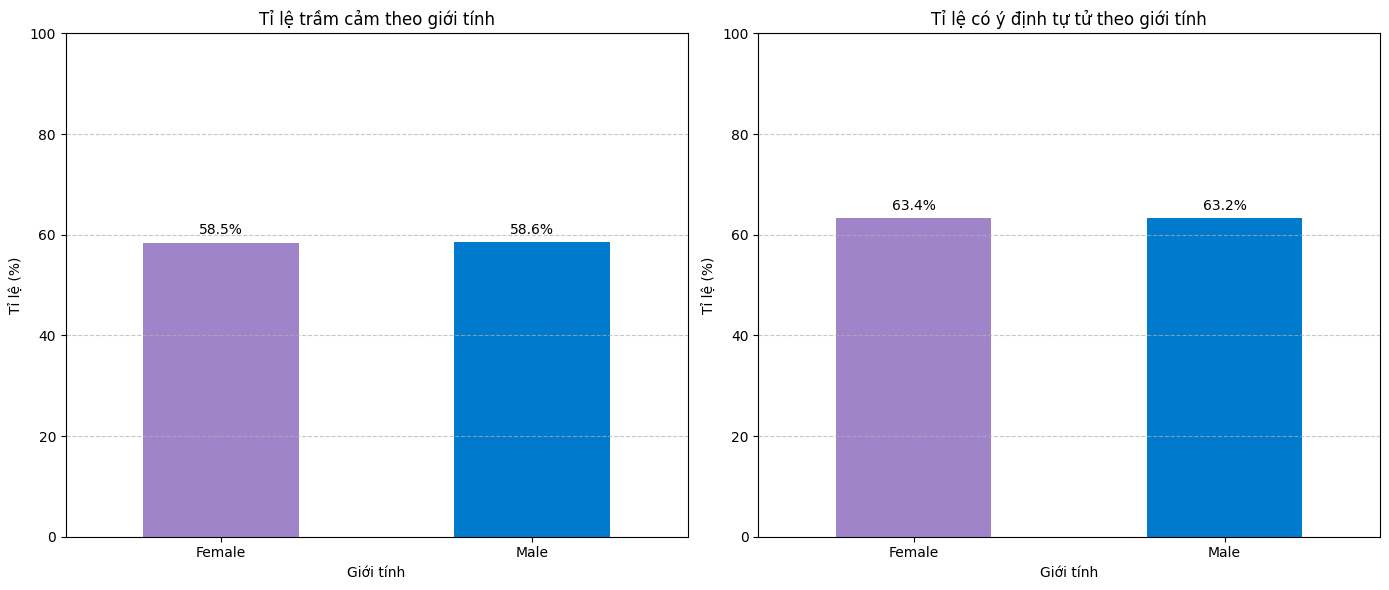

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ tỉ lệ trầm cảm theo giới tính
depression_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[0])
axes[0].set_title('Tỉ lệ trầm cảm theo giới tính')
axes[0].set_ylabel('Tỉ lệ (%)')
axes[0].set_xlabel('Giới tính')
axes[0].set_xticks(range(len(depression_rate.index)))
axes[0].set_xticklabels(depression_rate.index, rotation=0)
axes[0].set_ylim(0, 100)
# Hiển thị giá trị trên đầu mỗi cột
for i, value in enumerate(depression_rate):
    axes[0].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ tỉ lệ có ý định tự tử theo giới tính
suicida_thoughts_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[1])
axes[1].set_title('Tỉ lệ có ý định tự tử theo giới tính')
axes[1].set_ylabel('Tỉ lệ (%)')
axes[1].set_xlabel('Giới tính')
axes[1].set_xticks(range(len(suicida_thoughts_rate.index)))
axes[1].set_xticklabels(suicida_thoughts_rate.index, rotation=0)
axes[1].set_ylim(0, 100)
for i, value in enumerate(suicida_thoughts_rate):
    axes[1].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Gender`, `Depression`,`Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    * Biểu đồ so sánh hai vấn đề quan trọng của bệnh trầm cảm giữa hai nhóm đối tượng nam và nữ, sử dụng biểu đồ cột giúp dễ dàng thực hiện so sánh hơn.
    * Đối với vấn đề trầm cảm, biểu đồ cho thấy ở cả hai giới tính thì giới trẻ hiện nay có nguy cơ mắc bệnh trầm cảm đều ở mức cao và hầu như không có sự khác biệt đối với cả hai giới tính.
    * Đối với vấn đề "Đã từng có ý nghĩ đến việc tự sát", giá trị này thậm chí còn cao hơn so với nguy cơ mắc bệnh trầm cảm và không có sự khác biệt to lớn cả hai nhóm giới tính.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt AI hỗ trợ phân tích**: quan sát biều đồ, không cần nhận xét biểu đồ. Với thông tin thực tế rằng tỉ lệ mắc bệnh trầm cảm ở nữ cao gấp đôi so với nam giới, biểu đồ trên được thực hiện trên một nhóm đối tượng học sinh, sinh viên phần lớn dưới 25 tuổi với đa dạng ngành học và đều là người Ấn Độ. Hãy thực hiện một số phân tích và giải thích cho sự sai lệch này, cũng như có thể nói gì về tình hình trầm cảm đối với giới tính thể hiện qua biểu đồ.

#### 🧠 **Phân tích sâu về tình trạng trầm cảm theo giới tính**

#####  ❓  **1. Tại sao nữ giới thường được cho là có nguy cơ trầm cảm cao hơn?**
- Các nghiên cứu toàn cầu chỉ ra rằng **phụ nữ có tỷ lệ trầm cảm cao hơn nam giới khoảng 1.5 đến 2 lần**.
- Một số nguyên nhân chính bao gồm:
  - Biến động hormone (đặc biệt trong tuổi dậy thì, thai kỳ, hậu sản)
  - Áp lực kép giữa công việc và vai trò truyền thống trong gia đình
  - Mức độ **dễ tổn thương tâm lý và biểu hiện cảm xúc cao hơn nam giới**

#####  ⚠️  **2. Tuy nhiên, dữ liệu thực tế không phải lúc nào cũng phản ánh như vậy**
- Trong nhiều nghiên cứu hiện đại (đặc biệt là ở người trẻ), tỷ lệ trầm cảm giữa hai giới **có thể gần bằng nhau**.
- Điều này có thể do:
  - **Nam giới trẻ ngày nay cũng chịu áp lực lớn**, như áp lực học tập, tài chính, tìm kiếm công việc.
  - **Văn hóa chia sẻ cảm xúc đang dần thay đổi**, khiến nam giới thể hiện vấn đề tâm lý nhiều hơn.
  - Khảo sát ẩn danh giúp giảm thiên lệch "giấu bệnh" ở nam giới.

#####  🌐  **3. Vai trò của bối cảnh xã hội và văn hóa**
- Ở các nước như Ấn Độ, nơi hệ thống giáo dục cạnh tranh gay gắt và kỳ vọng xã hội cao:
  - Cả nam và nữ đều có thể bị ảnh hưởng mạnh bởi **áp lực học tập**, **gia đình**, **sự bất ổn tài chính**.
  - Trong môi trường đại học, **giới tính có thể không còn là yếu tố phân biệt mạnh** về mức độ trầm cảm.

#####  ✅  **Kết luận và gợi ý hướng giải pháp**
> Giới tính có thể ảnh hưởng đến nguy cơ trầm cảm, nhưng trong nhóm sinh viên trẻ, đặc biệt là ở các quốc gia đang phát triển, **trầm cảm có xu hướng ảnh hưởng gần như đồng đều đến cả hai giới**. Việc tập trung phân tích thêm các yếu tố xã hội, tâm lý và môi trường sẽ cho kết quả toàn diện và có giá trị hơn.


### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 2: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào?</span> <a id="ii2"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Chế độ ăn uống lành mạnh cung cấp các dưỡng chất cần thiết cho não bộ và cơ thể, giúp duy trì sự ổn định về hóa học và giảm viêm. Giấc ngủ đủ và chất lượng cho phép não bộ phục hồi, xử lý cảm xúc và hoạt động tối ưu. Khi cả hai yếu tố này bị xáo trộn, nó có thể làm tăng nguy cơ và mức độ nghiêm trọng của trầm cảm. Việc chú trọng đến cả chế độ ăn uống và giấc ngủ là một phần quan trọng trong việc phòng ngừa và hỗ trợ điều trị trầm cảm.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Phân tích mối liên hệ giữa ăn uống, giấc ngủ và trầm cảm giúp ta hiểu rõ hơn nguyên nhân sâu xa của bệnh, từ đó phát triển các biện pháp can thiệp hiệu quả hơn dựa trên lối sống, cá nhân hóa phương pháp điều trị. Đồng thời đề xuất những khuyến nghị cụ thể để cải thiện sức khỏe tinh thần. Và cũng góp phần định hướng cho các chiến lược hỗ trợ sinh viên tại trường học hoặc trong cộng đồng.

#### <span style="color:#CCCCCC; font-weight:bold;"> 2.1: Cách thời gian ngủ tác động đến sức khỏe tinh thần<span> <a id="ii2-1"></a>

* <span style="font-style:italic;">Trực quan hoá</span>

In [8]:
# Xem xét các giá trị duy nhất trong cột Sleep Duration
print(data["Sleep Duration"].value_counts())
print(data["Sleep Duration"].unique())

Sleep Duration
'Less than 5 hours'    8302
'7-8 hours'            7336
'5-6 hours'            6175
'More than 8 hours'    6041
Others                   18
Name: count, dtype: int64
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


In [9]:
# Loại bỏ các giá trị không xác định
sleep_analyze_df = data[data['Sleep Duration'] != 'Others'].copy()

# Mapping sleep duration từ dạng phân loại sang giá trị số trung bình
sleep_map = {
    "'Less than 5 hours'": '<5h',
    "'5-6 hours'": '5-6h',
    "'7-8 hours'": '7-8h',
    "'More than 8 hours'": '>8h'
}

sleep_analyze_df['Sleep Duration'] = sleep_analyze_df['Sleep Duration'].map(sleep_map)

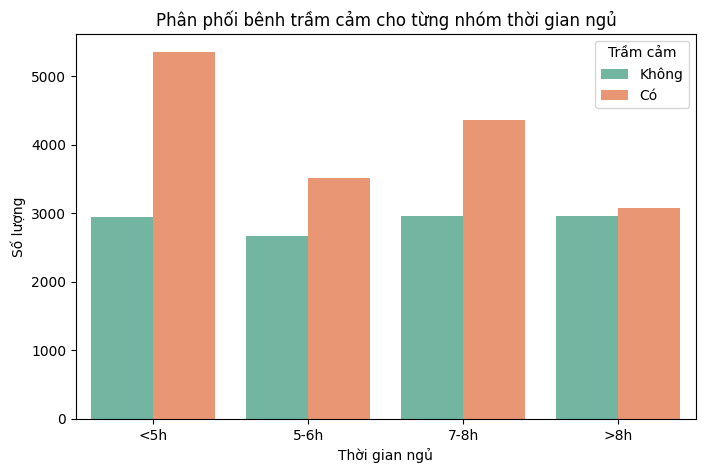

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sleep Duration', 
              hue='Depression', 
              data=sleep_analyze_df, 
              palette="Set2",
              order=['<5h', '5-6h', '7-8h', '>8h'])
plt.title("Phân phối bênh trầm cảm cho từng nhóm thời gian ngủ")
plt.xlabel("Thời gian ngủ")
plt.ylabel("Số lượng")
plt.legend(title="Trầm cảm",
           labels=['Không', 'Có'])
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ là histogram (cột) cho từng nhóm thời gian ngủ và tình trạng tâm lý trong nhóm tương ứng.

    - Nhận xét chung:

        - < 5 giờ → Rất nhiều sinh viên ngủ ít

        - 7 - 8 giờ → Nhiều sinh viên ngủ gần đủ giấc

        - \> 8 giờ → Một số sinh viên ngủ nhiều hơn

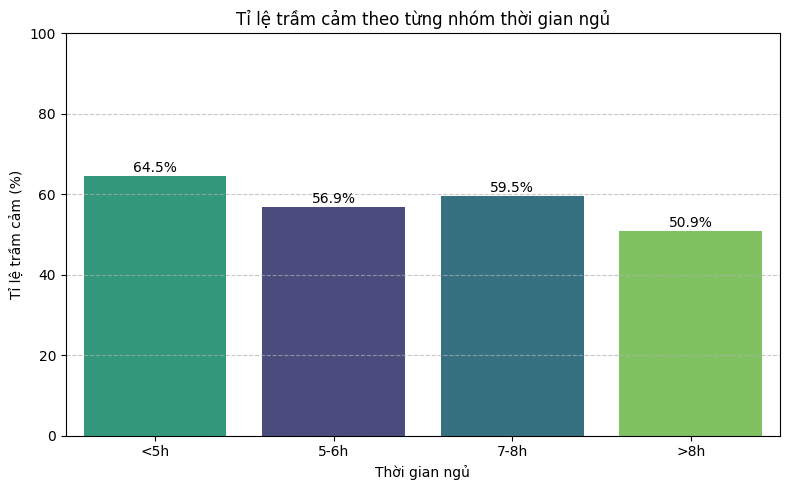

In [11]:
# Đếm tổng số mỗi giá trị Depression theo từng nhóm Sleep Duration
group_counts = sleep_analyze_df.groupby('Sleep Duration')['Depression'].value_counts(normalize=True)

# Lấy phần trăm giá trị 1 (Trầm cảm) trong mỗi nhóm Sleep Duration
percent_depression_per_sleep_duration = group_counts.loc[:, 1] * 100
percent_depression_per_sleep_duration_df = percent_depression_per_sleep_duration.reset_index(name='% of Depression')

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=percent_depression_per_sleep_duration_df,
    x='Sleep Duration',
    y='% of Depression',
    palette='viridis',
    hue='Sleep Duration',
    legend=False,
    order=['<5h', '5-6h', '7-8h', '>8h']
)

# Thêm nhãn giá trị trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center'
    )

# Tuỳ chỉnh
plt.title('Tỉ lệ trầm cảm theo từng nhóm thời gian ngủ')
plt.xlabel('Thời gian ngủ')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ thể hiện tỉ lệ sinh viên bị trầm cảm cho từng nhóm thời gian ngủ: Các cột đại diện cho tỉ lệ sinh viên bị trầm cảm đối với thời gian ngủ tương ứng

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: (Upload hình ảnh) "Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng thiếu ngủ là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về tỉ lệ trầm cảm theo từng nhóm thời gian ngủ."

**Nhận xét chung**:

- Biểu đồ cho thấy rõ ràng nhóm ngủ ít hơn 5 tiếng có tỉ lệ trầm cảm cao nhất (64.5%), và nhóm ngủ trên 8 tiếng có tỉ lệ trầm cảm thấp nhất (50.9%).

- Điều này phù hợp với thực tế khoa học rằng thiếu ngủ là yếu tố nguy cơ rất lớn gây stress và trầm cảm.

- Ngoài ra, điểm thú vị là nhóm ngủ 7-8 tiếng – vốn được coi là mức ngủ lý tưởng – lại có tỉ lệ trầm cảm (59.5%) cao hơn nhóm ngủ 5-6 tiếng (56.9%).

- Điều này có thể gợi ý rằng chất lượng giấc ngủ hoặc những yếu tố khác như áp lực học tập, lối sống, tâm lý cũng ảnh hưởng lớn, chứ không chỉ đơn thuần thời lượng ngủ.

**Prompt hỗ trợ phân tích sâu hơn**: "Đưa ra những nguyên nhân sâu xa, có liên quan đến bối cảnh xã hội, tương tác 2 chiều giữa giấc ngủ và trầm cảm."

#### 🧠 **Phân tích sâu về mối liên hệ giữa học vấn và trầm cảm**

#####  🎓  1. Áp lực xã hội và học tập
- Học sinh, sinh viên Ấn Độ chịu áp lực rất lớn từ gia đình, nhà trường và xã hội về thành tích học tập, thi cử, nghề nghiệp tương lai.
- Áp lực này gây stress mãn tính, dẫn đến mất ngủ, ngủ ít.
- Thiếu ngủ kéo dài làm hệ thần kinh dễ tổn thương, giảm khả năng điều tiết cảm xúc, tăng nguy cơ trầm cảm.

#####  💥  2. Tương tác 2 chiều: trầm cảm ảnh hưởng ngược lại đến giấc ngủ
- Người bị trầm cảm thường khó ngủ, dễ thức dậy giữa đêm hoặc ngủ không sâu.
- Ngược lại, thiếu ngủ lại làm trầm trọng thêm các triệu chứng trầm cảm như buồn bã, mất động lực, cảm giác vô vọng.
- Từ đó tạo thành vòng xoáy tiêu cực: mất ngủ → trầm cảm nặng hơn → mất ngủ nhiều hơn.

#####  ⏱️  3. Văn hóa “hustle culture” và “chạy đua thành tích”
- Ở nhiều môi trường học thuật, việc thức khuya học bài hoặc làm việc thâu đêm được xem là bình thường hoặc thậm chí được tán dương.
- Điều này làm giấc ngủ bị đánh đổi để lấy sự công nhận xã hội, vô tình phá vỡ nhịp sinh học của cơ thể, tăng rối loạn tâm lý.

#####  🔺  4. Công nghệ và thói quen xấu trước khi ngủ
- Sử dụng điện thoại, mạng xã hội, game vào ban đêm rất phổ biến.
- Ánh sáng xanh từ màn hình làm ức chế melatonin, hormone gây buồn ngủ, khiến thời gian ngủ bị trễ.
- Các nội dung tiêu cực, tin tức xấu cũng kích thích lo âu, ảnh hưởng đến chất lượng giấc ngủ và sức khỏe tâm thần.

#####  ⚠️  5. Bất bình đẳng xã hội và điều kiện sống
- Những sinh viên đến từ hộ nghèo, hoặc vùng nông thôn lên thành phố học dễ chịu áp lực tài chính, thiếu thốn điều kiện sống (phòng trọ chật chội, ồn ào), khiến giấc ngủ không đảm bảo.
- Đồng thời, cảm giác bị cô lập xã hội hoặc áp lực hội nhập cũng là yếu tố nguy cơ lớn cho trầm cảm.

#####  ✅  **Kết luận và gợi ý hướng giải pháp**:
> Do đó, để giảm tỉ lệ trầm cảm trong nhóm học sinh, sinh viên, cần triển khai những biện pháp đa chiều:
> - Giáo dục về vệ sinh giấc ngủ (sleep hygiene) và quản lý stress.
> - Giảm áp lực thi cử, thay đổi cách đánh giá thành tích trong giáo dục.
> - Tăng cường hỗ trợ tâm lý học đường và xây dựng môi trường học tập thân thiện, bao dung.
> - Định hướng lại quan niệm xã hội về việc nghỉ ngơi và sức khỏe tâm thần, thay vì đề cao sự làm việc kiệt sức.

#### <span style="color:#CCCCCC; font-weight:bold;"> 2.2: Thói quen ăn uống tác động đến sức khỏe tinh thần như thế nào?<span> <a id="ii2-2"></a>

* <span style="font-style:italic;">Trực quan hoá</span>

In [12]:
# Xem xét các giá trị duy nhất trong cột Dietary Habits
print(data["Dietary Habits"].value_counts())
print(data["Dietary Habits"].unique())

Dietary Habits
Unhealthy    10303
Moderate      9915
Healthy       7642
Others          12
Name: count, dtype: int64
['Healthy' 'Moderate' 'Unhealthy' 'Others']


In [13]:
# Loại bỏ các giá trị không xác định
diet_analyze_df = data[data['Dietary Habits'] != 'Others'].copy()

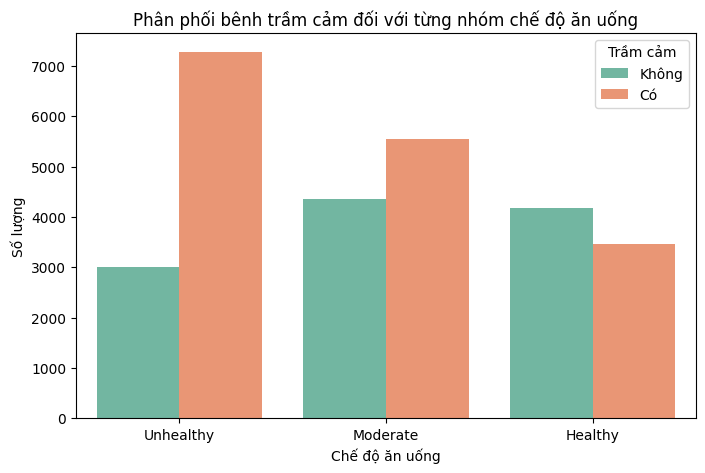

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Dietary Habits', 
              hue='Depression', 
              data=diet_analyze_df, 
              palette="Set2",
              order=['Unhealthy', 'Moderate', 'Healthy'])
plt.title("Phân phối bênh trầm cảm đối với từng nhóm chế độ ăn uống")
plt.xlabel("Chế độ ăn uống")
plt.ylabel("Số lượng")
plt.legend(title="Trầm cảm",
           labels=['Không', 'Có'])
plt.show()

- Thuộc tính sử dụng: `Dietary Habits`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ là histogram (cột) cho từng nhóm chế độ ăn uống và tình trạng tâm lý trong nhóm tương ứng.

    - Nhận xét chung:

        - Healthy → Tương đối ít người trong khảo sát có chế độ ăn uống lành mạnh

        - Unhealthy, Moderate → Nhiều người không thực sự quan tâm đến chế độ ăn uống (ăn uống bình thường, thậm chí thiếu lành mạnh).

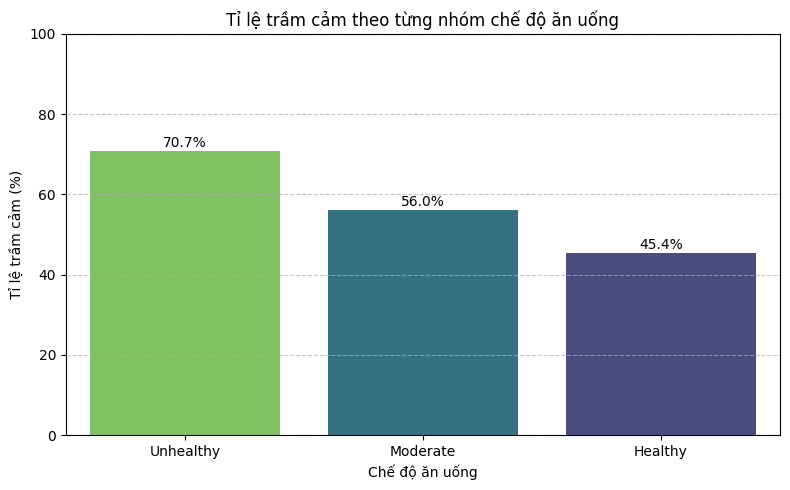

In [15]:
# Đếm tổng số mỗi giá trị Depression theo từng nhóm Dietary Habits
group_counts = data.groupby('Dietary Habits')['Depression'].value_counts(normalize=True)

# Lấy phần trăm giá trị 1 (Trầm cảm) trong mỗi nhóm Dietary Habits
percent_depression_per_diet = group_counts.loc[:, 1] * 100
percent_depression_per_diet_df = percent_depression_per_diet.reset_index(name='% of Depression')

percent_depression_per_diet_df

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=percent_depression_per_diet_df,
    x='Dietary Habits',
    y='% of Depression',
    palette='viridis',
    hue='Dietary Habits',
    legend=False,
    order=['Unhealthy', 'Moderate','Healthy']
)

# Thêm nhãn giá trị trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center'
    )

# Tuỳ chỉnh
plt.title('Tỉ lệ trầm cảm theo từng nhóm chế độ ăn uống')
plt.xlabel('Chế độ ăn uống')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị
plt.show()

- Thuộc tính sử dụng: `Dietary Habits`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ thể hiện tỉ lệ sinh viên bị trầm cảm đối với từng chế độ ăn uống: 
    - Các cột đại diện cho tỉ lệ sinh viên bị trầm cảm đối với chế độ ăn uống tương ứng

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: (Upload hình ảnh) Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng chế độ ăn uống có tác động không nhỏ đối với sức khỏe tinh thần, đặc biệt là bệnh trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về tỉ lệ trầm cảm theo từng nhóm chế độ ăn uống.

Nhận xét chung

- Dữ liệu từ nhóm học sinh, sinh viên Ấn Độ cho thấy tỉ lệ trầm cảm giảm dần theo mức độ lành mạnh của chế độ ăn uống: từ 70.7% ở nhóm ăn uống không lành mạnh, còn 56.0% ở nhóm ăn uống trung bình, và thấp nhất 45.4% ở nhóm ăn uống lành mạnh.

- Điều này khẳng định thực tế rằng chế độ dinh dưỡng đóng vai trò quan trọng trong việc bảo vệ sức khỏe tâm thần, đặc biệt là phòng ngừa trầm cảm.

**Prompt hỗ trợ phân tích sâu hơn**: đưa ra những nguyên nhân sâu xa, có liên quan đến bối cảnh xã hội, tương tác 2 chiều giữa chế độ ăn uống và trầm cảm.

#####  ⚠️  **1. Nguyên nhân sâu xa trong bối cảnh xã hội**

- Áp lực học tập và thi cử ở học sinh, sinh viên Ấn Độ rất nặng nề, khiến nhiều bạn chọn thức ăn nhanh, tiện lợi để tiết kiệm thời gian, bất chấp chất lượng dinh dưỡng kém.

- Khó khăn tài chính khiến sinh viên phải ưu tiên những thực phẩm rẻ tiền, giàu năng lượng nhưng nghèo vi chất (fast food, đồ ăn chế biến sẵn), lâu dài dẫn đến thiếu hụt các dưỡng chất thiết yếu cho hoạt động thần kinh.

- Thiếu môi trường hỗ trợ dinh dưỡng hợp lý: ký túc xá, căng-tin trường thường không có nhiều lựa chọn ăn uống lành mạnh, đặc biệt ở các khu vực thành phố nhỏ hoặc vùng nông thôn.

- Văn hóa xã hội hiện đại (đặc biệt trong giới trẻ) ngày càng chấp nhận việc ăn uống thất thường, bỏ bữa, dùng đồ uống có caffein hoặc thực phẩm nhiều đường như một "chiến lược sống sót" trong guồng quay học hành và làm việc căng thẳng.

#####  💥  **2. Tương tác 2 chiều giữa chế độ ăn uống và trầm cảm**

- Chế độ ăn uống kém → Trầm cảm:

    - Ăn uống thiếu dinh dưỡng gây viêm thần kinh (neuroinflammation), ảnh hưởng đến quá trình sản xuất serotonin, dopamine – những chất dẫn truyền thần kinh kiểm soát tâm trạng.

    - Thiếu hụt omega-3, vitamin D, B6, B12 khiến hoạt động của não bộ suy giảm, làm tăng nguy cơ rối loạn lo âu, trầm cảm.

- Trầm cảm → Chế độ ăn uống kém:

    - Người bị trầm cảm thường giảm động lực tự chăm sóc bản thân, dẫn đến bỏ bữa, ăn uống thất thường hoặc chọn thực phẩm "comfort food" (nhiều đường, nhiều chất béo) để tìm cảm giác an ủi tạm thời.

    - Trầm cảm làm rối loạn cơ chế cảm giác đói no, gây nên hành vi ăn quá nhiều hoặc chán ăn, làm chế độ dinh dưỡng càng trở nên mất cân bằng.


#####  ✅  **Kết luận và hướng giải pháp**:

> Chế độ ăn uống và trầm cảm không tồn tại tách rời, mà tương tác lẫn nhau, tạo thành vòng xoáy tiêu cực. Để can thiệp hiệu quả, cần không chỉ giáo dục cá nhân về ăn uống lành mạnh, mà còn cải thiện môi trường xã hội (giáo dục, kinh tế, dịch vụ hỗ trợ) để học sinh, sinh viên có điều kiện dễ dàng thực hành những lựa chọn tốt cho sức khỏe tinh thần.

#### <span style="color:#CCCCCC; font-weight:bold;"> 2.3: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào<span> <a id="ii2-3"></a>

* <span style="font-style:italic;">Trực quan hoá</span>

In [16]:
# Loại bỏ các giá trị không xác định
lifestyle_df = data[(data['Sleep Duration'] != 'Others') & (data['Dietary Habits'] != 'Others')].copy()

# Bước 1: Groupby để đếm như mày làm
lifestyle_df = lifestyle_df.groupby(['Dietary Habits', 'Sleep Duration', 'Depression']).size().reset_index(name='count')

# Bước 2: Tính phần trăm trong từng nhóm ['Dietary Habits', 'Sleep Duration']
lifestyle_df['percent'] = lifestyle_df.groupby(['Dietary Habits', 'Sleep Duration'])['count'].transform(lambda x: 100 * x / x.sum())

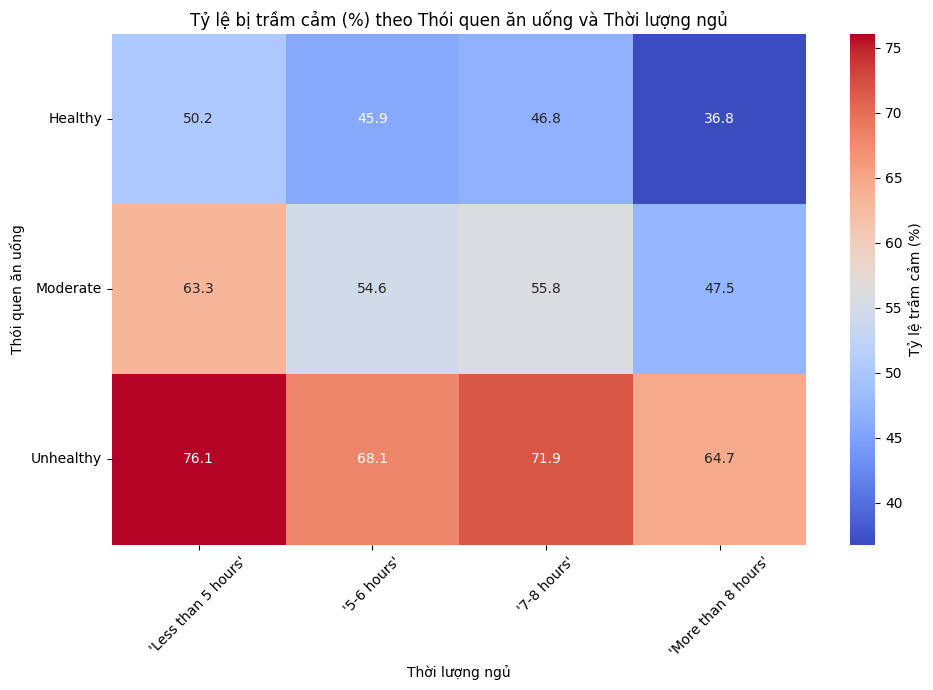

In [17]:
# Lấy dữ liệu bị trầm cảm
heatmap_data = lifestyle_df[lifestyle_df['Depression'] == 1].copy()

# Tạo thứ tự mong muốn
diet_order = ['Healthy', 'Moderate', 'Unhealthy']             # từ xấu -> tốt
sleep_order = ["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'"]         # giữ nguyên

# B2: Pivot thành bảng dạng (Dietary Habits x Sleep Duration) với giá trị là percent
heatmap_data = heatmap_data.pivot(index='Dietary Habits', columns='Sleep Duration', values='percent')

# Sắp xếp lại index (hàng) theo thứ tự mong muốn
heatmap_data = heatmap_data.reindex(diet_order)

# Sắp xếp lại columns (cột) theo thứ tự mong muốn
heatmap_data = heatmap_data[sleep_order]

# B3: Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Tỷ lệ trầm cảm (%)'})
plt.title('Tỷ lệ bị trầm cảm (%) theo Thói quen ăn uống và Thời lượng ngủ')
plt.xlabel('Thời lượng ngủ')
plt.ylabel('Thói quen ăn uống')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: (Upload hình ảnh) Quan sát biểu đồ, không cần mô tả lại biểu đồ. Biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, đến từ nhiều ngành học khác nhau, cho thấy sự ảnh hưởng của lối sống đến sức khỏe tinh thần.

Nhận xét chung: 
- Học sinh, sinh viên có chế độ ăn uống lành mạnh và ngủ nhiều hơn 8 tiếng có tỷ lệ trầm cảm thấp nhất (36.8%).

- Ngược lại, những người ăn uống không lành mạnh và ngủ ít hơn 5 tiếng có tỷ lệ trầm cảm cao nhất (76.1%).

- Cả chế độ ăn uống và thời lượng ngủ đều ảnh hưởng mạnh mẽ đến sức khỏe tinh thần: càng ăn uống không lành mạnh và càng ngủ ít thì tỷ lệ trầm cảm càng cao.

- Ngay cả khi ngủ đủ (7–8 tiếng), nếu chế độ ăn uống unhealthy thì tỷ lệ trầm cảm vẫn khá cao (71.9%).

- Lối sống cân bằng (ăn uống healthy và ngủ đủ) thực sự có lợi cho tinh thần của sinh viên, bất kể ngành học.

**Prompt hỗ trợ phân tích sâu hơn**: đưa ra những nguyên nhân sâu xa, có liên quan đến bối cảnh xã hội, tương tác 2 chiều giữa lối sống và bệnh trầm cảm.

#####  💥  **1. Áp lực xã hội và kỳ vọng học tập
- Ở Ấn Độ (và nhiều quốc gia khác), học sinh, sinh viên chịu áp lực rất lớn từ gia đình và xã hội về thành tích học tập, nghề nghiệp tương lai.

- Áp lực đó tạo ra thói quen sinh hoạt thiếu lành mạnh: ngủ ít, ăn uống thất thường, tìm tới thức ăn nhanh, đồ ngọt để giảm stress.

- Trầm cảm dần xuất hiện và kéo dài khi sức khỏe thể chất và tinh thần bị bào mòn.

- Vòng lặp hai chiều: Áp lực → Lối sống kém lành mạnh → Suy yếu tinh thần → Trầm cảm → Giảm khả năng học tập → Tăng áp lực.

#####  ❓  **2. Văn hóa bận rộn và coi nhẹ sức khỏe**
- Trong môi trường cạnh tranh cao, việc "hy sinh giấc ngủ", "cố gắng hết mình" được coi là đáng tự hào.

- Ngủ ít, ăn uống qua loa trở thành "chuẩn mực xã hội ngầm", đặc biệt ở những nhóm ngành như kỹ thuật, kinh doanh.

- Điều này bào mòn dần khả năng hồi phục tinh thần, làm tăng nguy cơ trầm cảm.

- Vòng lặp hai chiều: Văn hóa "cố gắng quá mức" → Thiếu ngủ, ăn uống tệ → Tâm trạng suy giảm → Cố gắng nhiều hơn để bù đắp → Sụp đổ tinh thần.

#####  ⏱️  **3. Suy giảm tự chăm sóc bản thân do trầm cảm**
- Khi bắt đầu có dấu hiệu trầm cảm nhẹ, người ta mất động lực trong việc ăn uống đầy đủ, ngủ đúng giờ.

- Chính vì vậy, lối sống xấu không chỉ là nguyên nhân mà còn là hậu quả của trầm cảm.

- Trầm cảm khiến việc duy trì những thói quen tốt (như nấu ăn, tập thể dục, ngủ đủ) trở nên cực kỳ khó khăn.

- Vòng lặp hai chiều: Trầm cảm nhẹ → Giảm khả năng chăm sóc bản thân → Lối sống tệ đi → Trầm cảm nặng hơn.

#####  🎓  **4. Thiếu mạng lưới hỗ trợ xã hội**
- Ở nhiều thành phố lớn của Ấn Độ, sinh viên thường sống xa nhà, ít sự kết nối gia đình.

- Cô đơn xã hội không chỉ trực tiếp gây trầm cảm mà còn gián tiếp khiến họ ít quan tâm đến sức khỏe bản thân.

- Sự thiếu vắng cộng đồng nâng đỡ làm cho các thói quen xấu dễ dàng hình thành và kéo dài.

#####  🔺  **5.   Sự phổ biến của đồ ăn nhanh và thức ăn công nghiệp**
- Các đô thị hóa nhanh làm cho thực phẩm chế biến sẵn, đồ ăn nhanh trở nên phổ biến.

- Những thực phẩm này giàu đường, chất béo xấu, làm mất cân bằng hệ vi sinh đường ruột – một yếu tố có ảnh hưởng lớn đến tâm trạng (theo nghiên cứu về gut-brain axis).

- Về lâu dài, ăn uống thiếu lành mạnh trực tiếp gây ra các rối loạn tâm thần.

#####  ✅  **Kết luận và gợi ý hướng giải pháp**

> Trầm cảm và lối sống xấu không chỉ là nguyên nhân và hậu quả đơn lẻ mà là một vòng xoắn ốc phức tạp, được thúc đẩy bởi bối cảnh xã hội, văn hóa, kinh tế. Để giải quyết vấn đề này một cách hiệu quả, cần có những can thiệp đa tầng, tập trung vào việc giảm áp lực học tập, cải thiện điều kiện kinh tế xã hội, nâng cao nhận thức về sức khỏe tinh thần và lối sống lành mạnh, đồng thời khuyến khích việc sử dụng công nghệ một cách có ý thức.

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 3: Sinh viên và vấn đề với bệnh trầm cảm.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Trầm cảm trong học đường, đặc biệt ở sinh viên và học sinh, đang là một vấn đề sức khoẻ tâm thần đáng báo động. Sinh viên là nhóm đang trong giai đoạn chuyển giao mạnh mẽ giữa tuổi thiếu niên và trưởng thành, phải đối mặt với:

- Áp lực học tập, thi cử, cạnh tranh.

- Lo âu về tương lai, nghề nghiệp, tài chính.

- Cô đơn, thiếu kết nối xã hội khi xa nhà hoặc trong môi trường mới.

Theo WHO, trầm cảm là một trong những nguyên nhân hàng đầu gây tàn tật và tử vong (tự tử) ở người trẻ tuổi.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Nhận diện nhóm có nguy cơ cao để can thiệp sớm.  
Giúp các trường học, tổ chức xã hội hiểu rõ hơn về tác động tâm lý của việc học.  
Khuyến khích cải thiện môi trường học tập lành mạnh, đồng thời nâng cao nhận thức về chăm sóc sức khỏe tinh thần.

* <span style="font-style:italic;">Trực quan hoá</span>

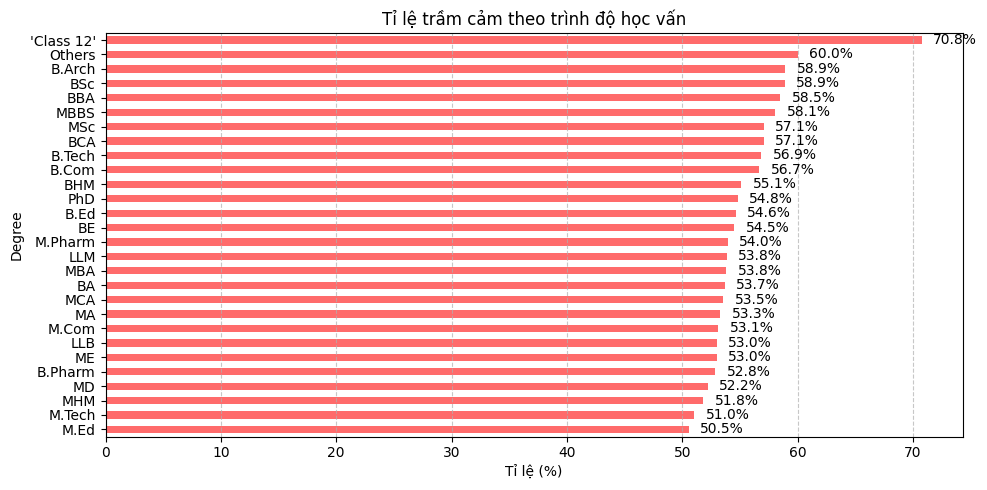

In [18]:
student_depression_analyze_df = data.copy()

total_by_degree = student_depression_analyze_df.groupby('Degree').size()
depressed_by_degree = student_depression_analyze_df[student_depression_analyze_df['Depression'] == 1].groupby('Degree').size()
depression_rate_by_degree = (depressed_by_degree / total_by_degree) * 100

depression_rate_by_degree.sort_values().plot(kind='barh', color='#FF6B6B', figsize=(10, 5))
plt.title('Tỉ lệ trầm cảm theo trình độ học vấn')
plt.xlabel('Tỉ lệ (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, val in enumerate(depression_rate_by_degree.sort_values()):
    plt.text(val + 1, i, f'{val:.1f}%', va='center')
plt.tight_layout()
plt.show()



- Thuộc tính sử dụng: `Degree`, `Depression`
- Nội dung biểu đồ:
    - Những người có trình độ học vấn thấp hơn (ví dụ như 'Class 12' – tương đương lớp 12 ở Ấn Độ) có tỷ lệ trầm cảm cao nhất (70.8%).

    - Tỷ lệ này giảm dần ở những trình độ học vấn cao hơn, đặc biệt trong nhóm sau đại học như MD, M.Ed, M.Tech.

    - Có thể giải thích do:

        - Các bạn học sinh cấp 3 đang ở giai đoạn "bản lề" với nhiều áp lực định hướng tương lai.

        - Người học cao hơn có thể đã thích nghi tốt hơn, phát triển cơ chế đối phó, hoặc đơn giản là nhóm “sống sót” qua các cấp học là những người ít bị ảnh hưởng tâm lý hơn.



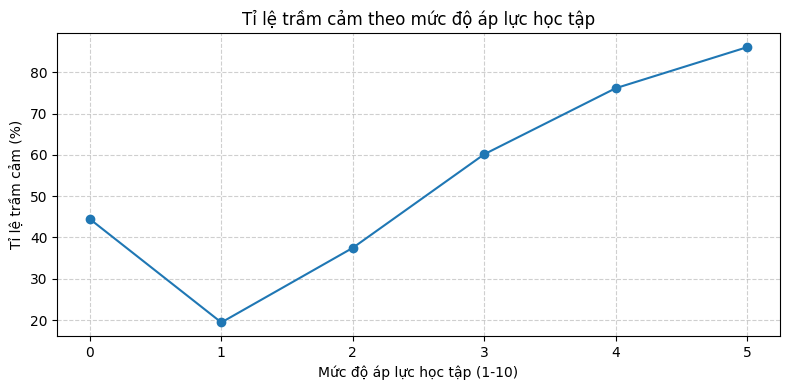

In [19]:
pressure_rate = student_depression_analyze_df.groupby('Academic Pressure')['Depression'].mean() * 100

pressure_rate.plot(kind='line', marker='o', color='#1f77b4', figsize=(8, 4))
plt.title('Tỉ lệ trầm cảm theo mức độ áp lực học tập')
plt.xlabel('Mức độ áp lực học tập (1-10)')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Khi áp lực học tập tăng, tỷ lệ trầm cảm tăng mạnh:

        - Ở mức áp lực 1: chỉ ~20%

        - Ở mức áp lực 5: lên đến ~87%

    - Mối quan hệ gần như tuyến tính tăng, phản ánh rằng áp lực học tập là một yếu tố nguy cơ trực tiếp dẫn đến trầm cảm.

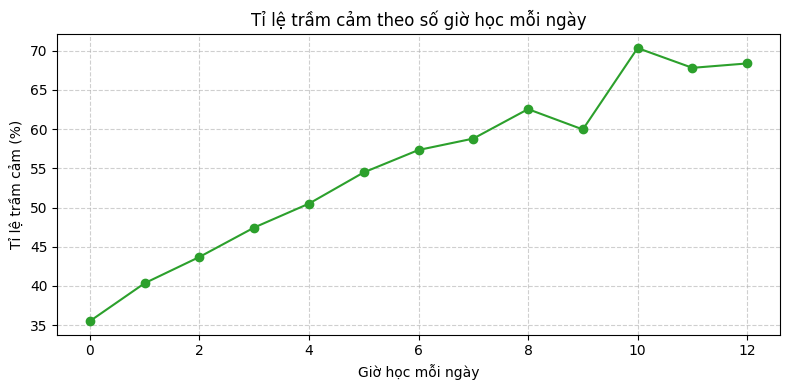

In [20]:
study_hours_rate = student_depression_analyze_df.groupby('Work/Study Hours')['Depression'].mean() * 100

study_hours_rate.plot(kind='line', marker='o', color='#2ca02c', figsize=(8, 4))
plt.title('Tỉ lệ trầm cảm theo số giờ học mỗi ngày')
plt.xlabel('Giờ học mỗi ngày')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Work/Study Hours`, `Depression`
- Nội dung biểu đồ:
    - Có xu hướng tăng đều: học càng nhiều giờ, nguy cơ trầm cảm càng cao.

    - Đặc biệt, sau ngưỡng 9–10 giờ/ngày, tỷ lệ trầm cảm chạm mức ~70%.

    - Dễ nhận thấy rằng việc thiếu thời gian nghỉ ngơi, học quá tải có ảnh hưởng tiêu cực rõ rệt đến sức khỏe tâm thần.

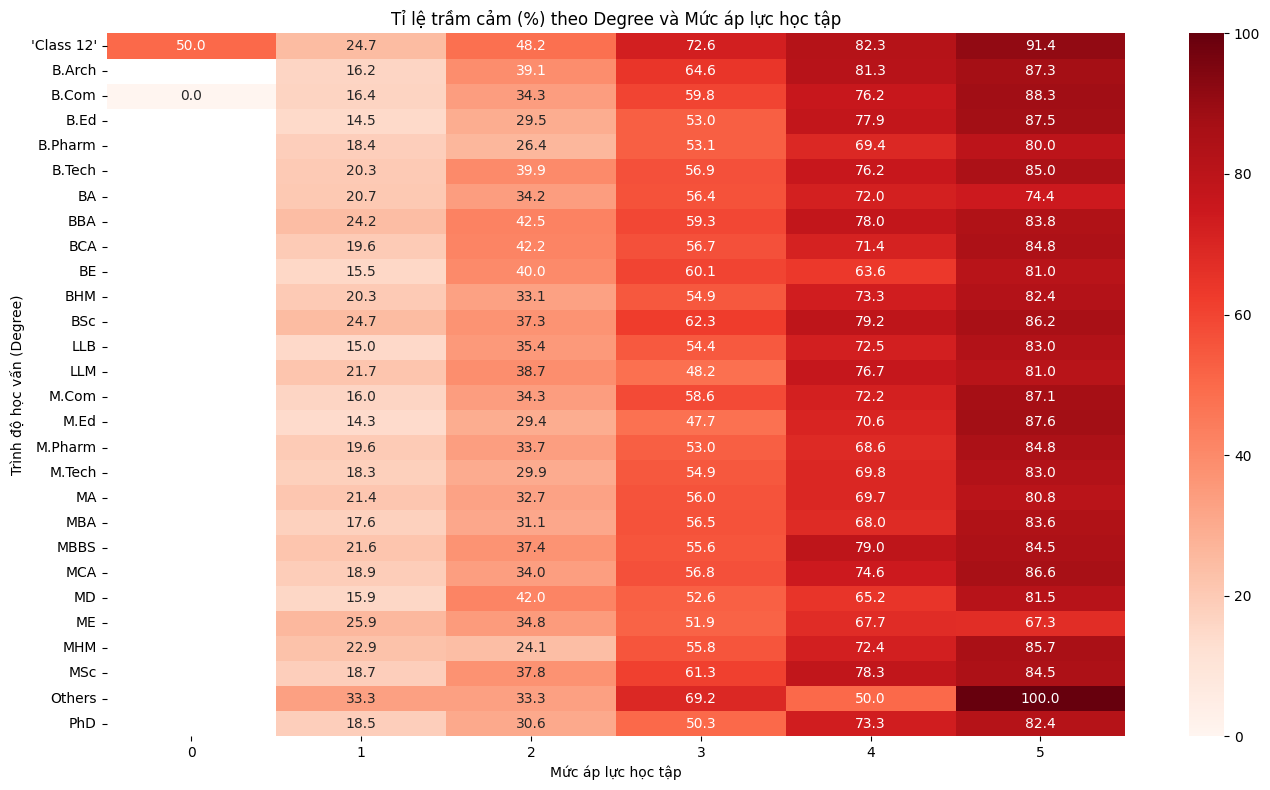

In [21]:
# Giả sử df là dataframe ban đầu
pivot = student_depression_analyze_df.groupby(['Degree', 'Academic Pressure'])['Depression'].mean().unstack() * 100

plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Tỉ lệ trầm cảm (%) theo Degree và Mức áp lực học tập")
plt.xlabel("Mức áp lực học tập")
plt.ylabel("Trình độ học vấn (Degree)")
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Academic Pressure`, `Degree`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ là heatmap thể hiện tỉ lệ trầm cảm theo `Degree` và `Academic Pressure`.
    
    - Mỗi dòng là 1 `Degree`.

    - Mỗi cột là mức `Academic Pressure`.

    - Màu thể hiện tỉ lệ trung bình `Depression`.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng thiếu ngủ là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, phần lớn dưới 25 tuổi, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về điểm trầm cảm trung bình theo thời lượng ngủ.

**Nhận xét chung**:

- Mối liên hệ thuận chiều rõ ràng: Tỉ lệ trầm cảm tăng đều theo từng mức áp lực học tập, từ rất thấp (0–1) tới cực cao (4–5), khẳng định áp lực học tập là yếu tố nguy cơ chính.

- Nguy cơ nền tảng vẫn tồn tại: Ngay ở mức áp lực thấp vẫn có 15–30% đối tượng gặp triệu chứng trầm cảm, cho thấy còn nhiều yếu tố khác (gia đình, kinh tế, môi trường…) cùng ảnh hưởng.

- Bất đối xứng giữa các ngành: Một số nhóm (như “Class 12”, “Others”, y dược, kiến trúc) có độ nhạy cao hơn, nghĩa là cùng một tăng áp lực, tỉ lệ trầm cảm của họ tăng nhanh và cao hơn so với các ngành khác.

- Ứng dụng thực tiễn: Cần kết hợp vừa giảm tải và phân bổ hợp lý khối lượng học tập, vừa xây dựng hệ thống hỗ trợ tâm lý – đặc biệt ưu tiên cho những nhóm ngành chịu áp lực lớn nhất.

- Hạn chế khảo sát: Đây là dữ liệu từ một nhóm sinh viên Ấn Độ, mang tính chất cắt ngang và tự báo cáo, nên khi áp dụng cần cân nhắc bổ sung nghiên cứu sâu hơn, đa dạng hóa mẫu và kiểm soát các yếu tố đồng nhiễu.

#### 🧠 **Phân tích sâu về mối liên hệ giữa học vấn và trầm cảm**

#####  🎓  **1. Tại sao trình độ học vấn lại ảnh hưởng đến trầm cảm?**
- Ở trình độ thấp (ví dụ: cấp 3), học sinh:

    - Chịu áp lực thi cử, chọn ngành, định hướng tương lai.

    - Thường thiếu sự hỗ trợ tâm lý hoặc kỹ năng ứng phó.

- Ngược lại, người học sau đại học:

    - Có thể đã qua giai đoạn khó khăn nhất.

    - Có sự ổn định về mặt nhận thức và mục tiêu học tập.

#####  💥  **2. Áp lực học tập là nguyên nhân chính gây ra trầm cảm?**
- Biểu đồ xác nhận điều này: áp lực càng cao → trầm cảm càng nhiều.

- Điều này phản ánh cần giáo dục kỹ năng quản lý stress và học hiệu quả trong nhà trường.

- Đồng thời cần làm việc với gia đình để tạo cho học sinh/sinh viên một môi trường học tập lành mạnh.

#####  ⏱️  **3. Số giờ học dài không tương đương hiệu quả học tập**
- Việc học quá 8–9 giờ/ngày có thể phản tác dụng.

- Gây kiệt sức về mặt tinh thần, thiếu ngủ, giảm hiệu quả học tập → góp phần vào trầm cảm.

- Học sinh/sinh viên nên học cách quản lý giấc ngủ phù hợp không nên ngủ quá nhiều cũng không nên ngủ quá ít.

#####  🔺  **4. Tỉ lệ trầm cảm tăng mạnh theo áp lực học tập**
- Tại mọi trình độ học vấn, ta thấy xu hướng rất rõ ràng: mức áp lực càng cao thì tỉ lệ trầm cảm càng tăng.

- Ví dụ:

    - MSc: từ 18.7% (áp lực 0) → 78.3% (áp lực 4)

    - 'Class 12': từ 50.0% (áp lực 0) → 91.4% (áp lực 5)

- Đây là mối tương quan trực tiếp và mạnh giữa áp lực học tập và sức khỏe tinh thần.

- 'Class 12' đặc biệt nổi bật:

    - Mức áp lực = 0 vẫn có 50% bị trầm cảm – cao nhất ở cột này.

    - Gợi ý rằng nhóm này có thể chịu ảnh hưởng bởi các yếu tố khác như:

    - Áp lực từ gia đình, kỳ vọng thi cử, chưa có kỹ năng đối phó với căng thẳng.

- Others và PhD cũng có tỷ lệ trầm cảm > 30% khi áp lực chỉ ở mức 0 hoặc 1.

- Các nhóm như M.Tech, MBA, MA, MCA, LLB, MD... thường có tỉ lệ trầm cảm thấp hơn khi so cùng mức áp lực.

- Ví dụ:

    - M.Tech: 29.9% (áp lực 1) → 69.8% (áp lực 4)

    - LLB: 35.4% (áp lực 1) → 72.5% (áp lực 4)

- Các nhóm này có thể đã quen với áp lực, có môi trường học chuyên sâu, hoặc hỗ trợ xã hội tốt hơn.

#####  ✅  **Kết luận và gợi ý hướng giải pháp**

> Trầm cảm là hệ quả rõ ràng của môi trường học tập quá căng thẳng. Phân tích trên cho thấy các yếu tố như trình độ học vấn thấp, áp lực học tập cao và số giờ học dài đều có liên quan mật thiết đến tỷ lệ trầm cảm. 👉 Để giảm thiểu tình trạng này, các trường học và gia đình nên:
> - Giảm áp lực học tập phi thực tế.
> - Cung cấp hỗ trợ tâm lý.
> - Khuyến khích cân bằng giữa học – nghỉ ngơi – hoạt động xã hội.

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 4: Áp lực tài chính và học tập</span> <a id="iv"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Ảnh hưởng trực tiếp đến sức khỏe tâm thần và thể chất của sinh viên.  
Tác động đến hiệu suất học tập và khả năng hoàn thành chương trình học.  
Có thể dẫn đến các vấn đề nghiêm trọng như trầm cảm và ý tưởng tự tử.  
Hiểu biết về mối quan hệ này giúp các tổ chức giáo dục thiết kế chương trình hỗ trợ phù hợp.  

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Xác định nhóm sinh viên có nguy cơ cao gặp khó khăn để can thiệp kịp thời.  
Phát triển các chính sách và chương trình hỗ trợ tài chính hiệu quả.  
Cải thiện môi trường học tập và giảm áp lực không cần thiết.  
Hiểu rõ mối tương quan giữa áp lực tài chính, áp lực học tập và các biến số khác như trầm cảm.  
Có cơ sở dữ liệu để đề xuất giải pháp cụ thể cho các vấn đề sinh viên đang gặp phải.  

* <span style="font-style:italic;">Trực quan hoá</span>

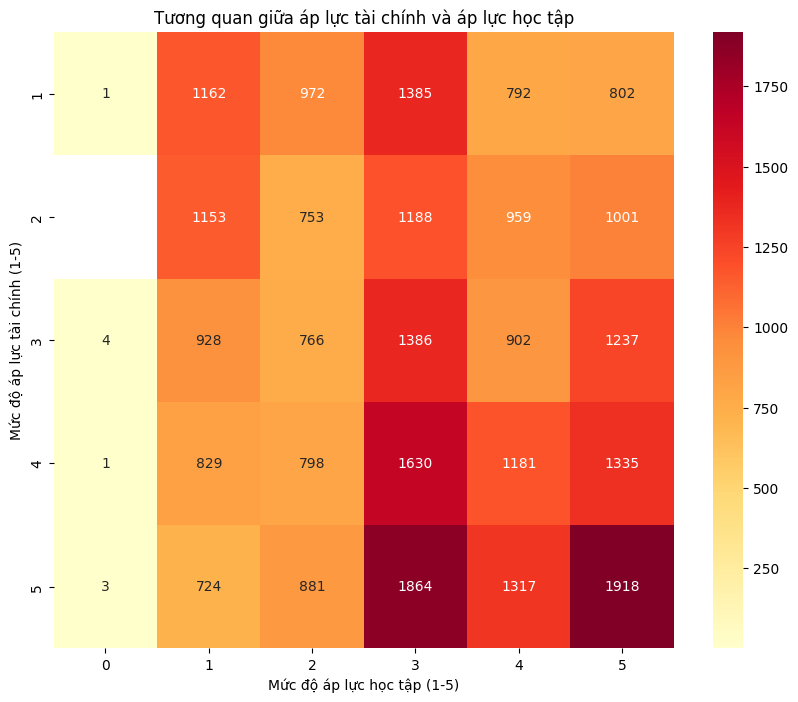

In [22]:
finanical_stress_depression_analyze_df = data.copy()

# 1. Biểu đồ tương quan giữa áp lực tài chính và áp lực học tập
plt.figure(figsize=(10, 8))
sns.heatmap(finanical_stress_depression_analyze_df.pivot_table(index='Financial Stress', columns='Academic Pressure', values='id', aggfunc='count'),
            cmap='YlOrRd', annot=True, fmt='g')
plt.title('Tương quan giữa áp lực tài chính và áp lực học tập')
plt.xlabel('Mức độ áp lực học tập (1-5)')
plt.ylabel('Mức độ áp lực tài chính (1-5)')
plt.show()

- Thuộc tính sử dụng: `Financial Stress`, `Academic Pressure`
- Nội dung biểu đồ:
    - Biểu đồ nhiệt thể hiện số lượng sinh viên theo từng tổ hợp mức độ:

    - Áp lực tài chính (trục Y, từ 1 đến 5)

    - Áp lực học tập (trục X, từ 1 đến 5)

    - Giá trị trong ô là số lượng sinh viên thuộc tổ hợp đó.

|Đặc điểm |Nội dung|
| ------- | ------ |
|Cụm đông nhất	|Áp lực tài chính 5 và áp lực học tập 5 (1918 sinh viên)|
|Xu hướng chính	|Khi áp lực tài chính tăng, áp lực học tập cũng có xu hướng tăng theo|
|Ngoại lệ	|Ở các mức tài chính thấp (1-2), học tập vẫn có nhiều sinh viên áp lực cao (4-5)|



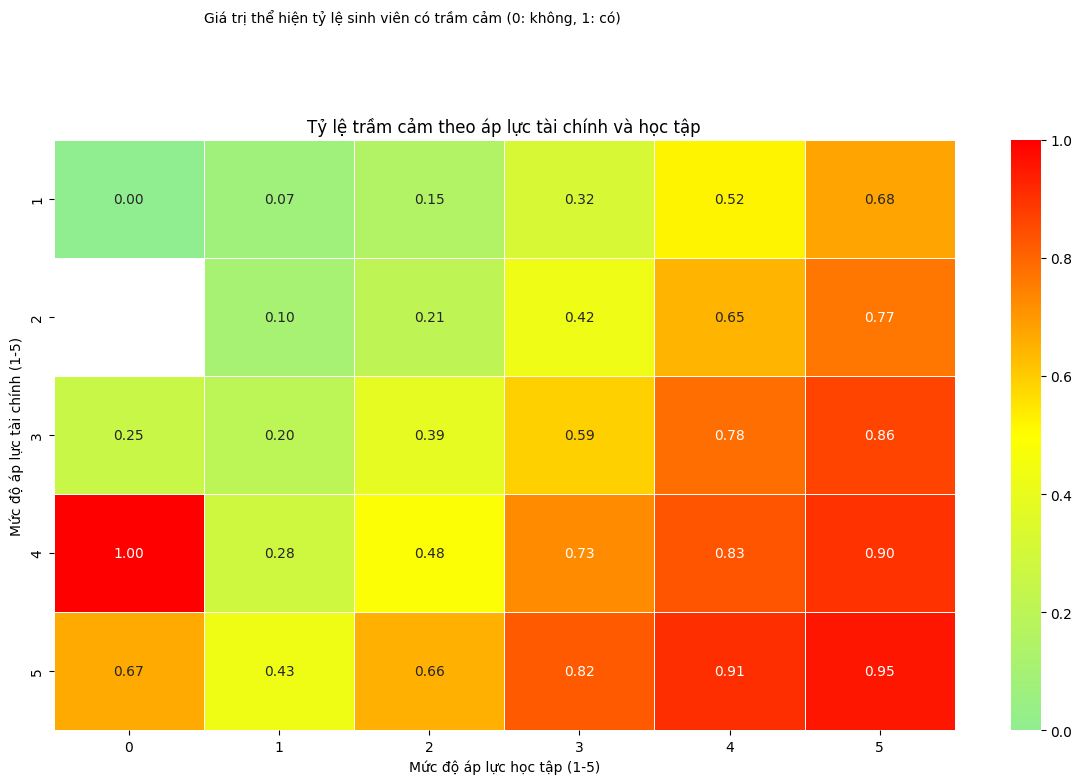

In [23]:
# 2. Biểu đồ mối quan hệ giữa áp lực tài chính, áp lực học tập và trầm cảm
plt.figure(figsize=(12, 8))

# Tạo bảng tỷ lệ trầm cảm theo áp lực tài chính và học tập
depression_rates = finanical_stress_depression_analyze_df.pivot_table(
    index='Financial Stress', 
    columns='Academic Pressure',
    values='Depression',
    aggfunc='mean'
)

# Vẽ heatmap
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['lightgreen', 'yellow', 'red'])
sns.heatmap(depression_rates, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Tỷ lệ trầm cảm theo áp lực tài chính và học tập')
plt.xlabel('Mức độ áp lực học tập (1-5)')
plt.ylabel('Mức độ áp lực tài chính (1-5)')

# Thêm chú thích
plt.text(1, -1, 'Giá trị thể hiện tỷ lệ sinh viên có trầm cảm (0: không, 1: có)', 
         fontsize=10, ha='left')

plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Financial Stress`, `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ thể hiện tỷ lệ sinh viên bị trầm cảm (giá trị từ 0 đến 1) theo từng tổ hợp:

    - Áp lực tài chính (trục Y: 1 → 5)

    - Áp lực học tập (trục X: 1 → 5)

    - Giá trị trong mỗi ô = (số sinh viên bị trầm cảm) / (tổng số sinh viên) của tổ hợp đó.

|Đặc điểm	|Nội dung|
| --------- | ------ |
|Cụm tỷ lệ trầm cảm cao nhất |Áp lực tài chính 5 - học tập 5 (95%)|
|Xu hướng chính	|Càng áp lực tài chính cao và học tập cao, tỷ lệ trầm cảm càng tăng mạnh|
|Ngoại lệ |Một số tổ hợp tài chính thấp - học tập cao cũng có tỷ lệ trầm cảm khá đáng kể|



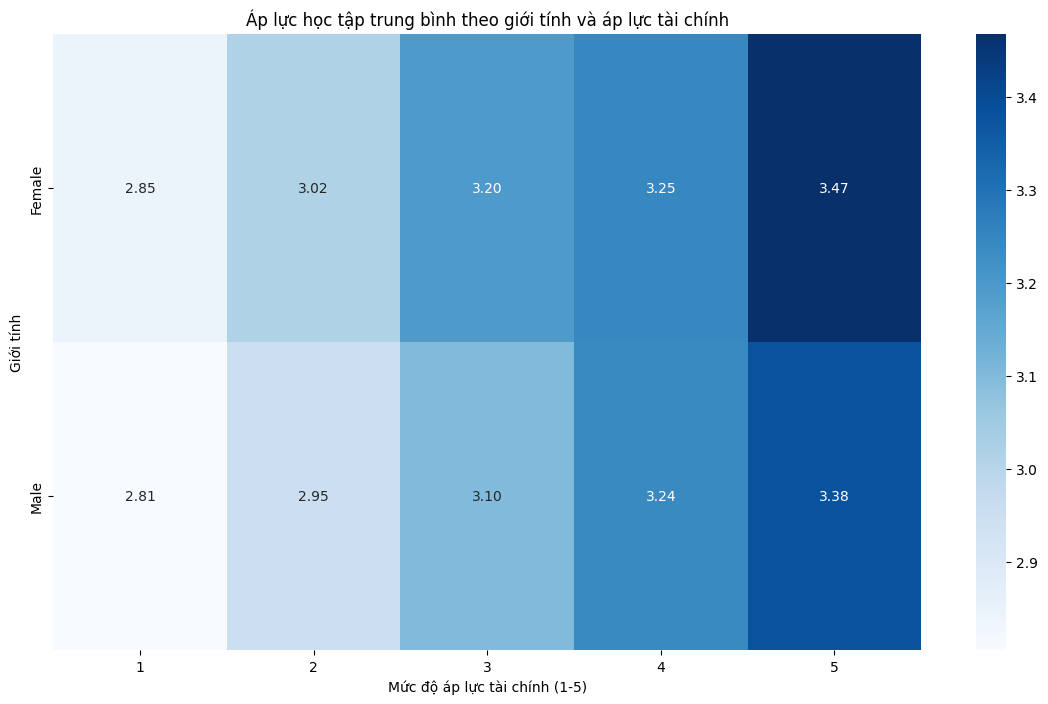

In [24]:
# 3. Biểu đồ phân tích đa biến: Áp lực học tập, tài chính, và giới tính
plt.figure(figsize=(14, 8))

# Tính giá trị trung bình của áp lực học tập theo giới tính và mức độ áp lực tài chính
gender_pressure = finanical_stress_depression_analyze_df.pivot_table(
    index='Gender', 
    columns='Financial Stress',
    values='Academic Pressure',
    aggfunc='mean'
)

# Vẽ heatmap
sns.heatmap(gender_pressure, cmap='Blues', annot=True, fmt='.2f')
plt.title('Áp lực học tập trung bình theo giới tính và áp lực tài chính')
plt.xlabel('Mức độ áp lực tài chính (1-5)')
plt.ylabel('Giới tính')
plt.show()

- Thuộc tính sử dụng: `Financial Stress`, `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Trục X: Mức độ áp lực tài chính (từ 1 đến 5).

    - Trục Y: Giới tính (Male, Female).

    - Giá trị trong từng ô: Điểm trung bình áp lực học tập (thang 1–5).

|Giới tính	|Mức 1	|Mức 2	|Mức 3	|Mức 4	|Mức 5|
| --------- | ----- | ----- | ----- | ----- | --- |
|Female	|2.85	|3.02	|3.20	|3.25	|3.47|
|Male	|2.81	|2.95	|3.10	|3.24	|3.38|


C:\Users\phatl\AppData\Local\Temp\ipykernel_2268\3364042663.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pressure = finanical_stress_depression_analyze_df.groupby('Age Group')[['Financial Stress', 'Academic Pressure']].mean()


<Figure size 1200x700 with 0 Axes>

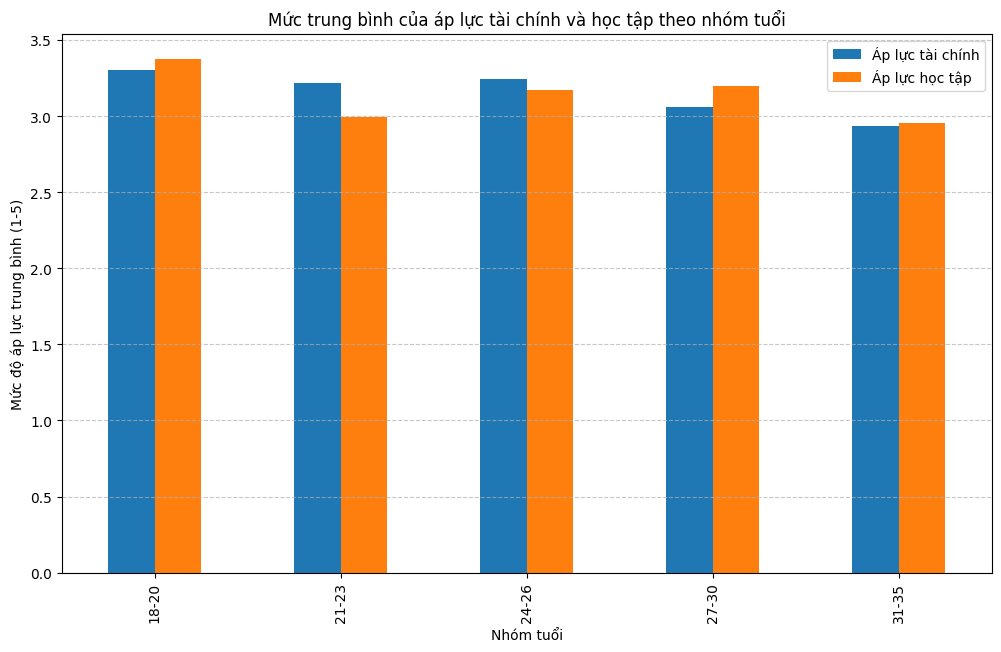

In [25]:
# 4. Biểu đồ mức trung bình của áp lực tài chính và học tập theo nhóm tuổi
plt.figure(figsize=(12, 7))

# Tạo nhóm tuổi
finanical_stress_depression_analyze_df['Age Group'] = pd.cut(finanical_stress_depression_analyze_df['Age'], bins=[17, 20, 23, 26, 30, 35], labels=['18-20', '21-23', '24-26', '27-30', '31-35'])

# Tính trung bình của áp lực theo nhóm tuổi
age_pressure = finanical_stress_depression_analyze_df.groupby('Age Group')[['Financial Stress', 'Academic Pressure']].mean()

age_pressure.plot(kind='bar', figsize=(12, 7))
plt.title('Mức trung bình của áp lực tài chính và học tập theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Mức độ áp lực trung bình (1-5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Áp lực tài chính', 'Áp lực học tập'])
plt.show()

- Thuộc tính sử dụng: `Financial Stress`, `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Trục X: Các nhóm tuổi (18–20, 21–23, 24–26, 27–30, 31–35).

    - Trục Y: Mức độ áp lực trung bình (thang 1–5).

    - Các cột:

        - Màu xanh: Áp lực tài chính trung bình.

         - Màu cam: Áp lực học tập trung bình.

|Nhóm tuổi	|Áp lực tài chính	|Áp lực học tập|
| --------- | ----------------- | ------------ |
|18–20	|~3.30	|~3.40|
|21–23	|~3.20	|~3.00|
|24–26	|~3.22	|~3.15|
|27–30	|~3.08	|~3.20|
|31–35	|~2.95	|~2.98|


In [26]:
# 5. Tính toán và hiển thị một số thống kê quan trọng
high_financial_stress = finanical_stress_depression_analyze_df[finanical_stress_depression_analyze_df['Financial Stress'] >= 4]
high_academic_pressure = finanical_stress_depression_analyze_df[finanical_stress_depression_analyze_df['Academic Pressure'] >= 4]
high_both_stress = finanical_stress_depression_analyze_df[(finanical_stress_depression_analyze_df['Financial Stress'] >= 4) & (finanical_stress_depression_analyze_df['Academic Pressure'] >= 4)]

stats = {
    'Tổng số sinh viên': len(finanical_stress_depression_analyze_df),
    'Số sinh viên có áp lực tài chính cao (≥4)': len(high_financial_stress),
    'Tỷ lệ sinh viên có áp lực tài chính cao': len(high_financial_stress) / len(finanical_stress_depression_analyze_df),
    'Số sinh viên có áp lực học tập cao (≥4)': len(high_academic_pressure),
    'Tỷ lệ sinh viên có áp lực học tập cao': len(high_academic_pressure) / len(finanical_stress_depression_analyze_df),
    'Số sinh viên chịu cả hai áp lực cao': len(high_both_stress),
    'Tỷ lệ sinh viên chịu cả hai áp lực cao': len(high_both_stress) / len(finanical_stress_depression_analyze_df),
    'Tỷ lệ trầm cảm ở nhóm áp lực tài chính cao': high_financial_stress['Depression'].mean(),
    'Tỷ lệ trầm cảm ở nhóm áp lực học tập cao': high_academic_pressure['Depression'].mean(),
    'Tỷ lệ trầm cảm ở nhóm chịu cả hai áp lực cao': high_both_stress['Depression'].mean(),
    'Tỷ lệ trầm cảm trong tổng thể': finanical_stress_depression_analyze_df['Depression'].mean(),
    'CGPA trung bình của nhóm áp lực tài chính cao': high_financial_stress['CGPA'].mean(),
    'CGPA trung bình của nhóm áp lực học tập': high_academic_pressure['CGPA'].mean(),
    'CGPA trung bình của nhóm chịu cả 2 áp lực cao': high_both_stress['CGPA'].mean(),
    'CGPA trung bình của toàn bộ sinh viên': finanical_stress_depression_analyze_df['CGPA'].mean()
}

# In kết quả thống kê
print("\n--- THỐNG KÊ TỔNG QUAN ---")
for key, value in stats.items():
    if "Tỷ lệ" in key:
        print(f"{key}: {value:.2%}")
    else:
        print(f"{key}: {value:.2f}")


--- THỐNG KÊ TỔNG QUAN ---
Tổng số sinh viên: 27872.00
Số sinh viên có áp lực tài chính cao (≥4): 12481.00
Tỷ lệ sinh viên có áp lực tài chính cao: 44.78%
Số sinh viên có áp lực học tập cao (≥4): 11444.00
Tỷ lệ sinh viên có áp lực học tập cao: 41.06%
Số sinh viên chịu cả hai áp lực cao: 5751.00
Tỷ lệ sinh viên chịu cả hai áp lực cao: 20.63%
Tỷ lệ trầm cảm ở nhóm áp lực tài chính cao: 75.63%
Tỷ lệ trầm cảm ở nhóm áp lực học tập cao: 81.61%
Tỷ lệ trầm cảm ở nhóm chịu cả hai áp lực cao: 90.68%
Tỷ lệ trầm cảm trong tổng thể: 58.55%
CGPA trung bình của nhóm áp lực tài chính cao: 7.67
CGPA trung bình của nhóm áp lực học tập: 7.62
CGPA trung bình của nhóm chịu cả 2 áp lực cao: 7.63
CGPA trung bình của toàn bộ sinh viên: 7.66


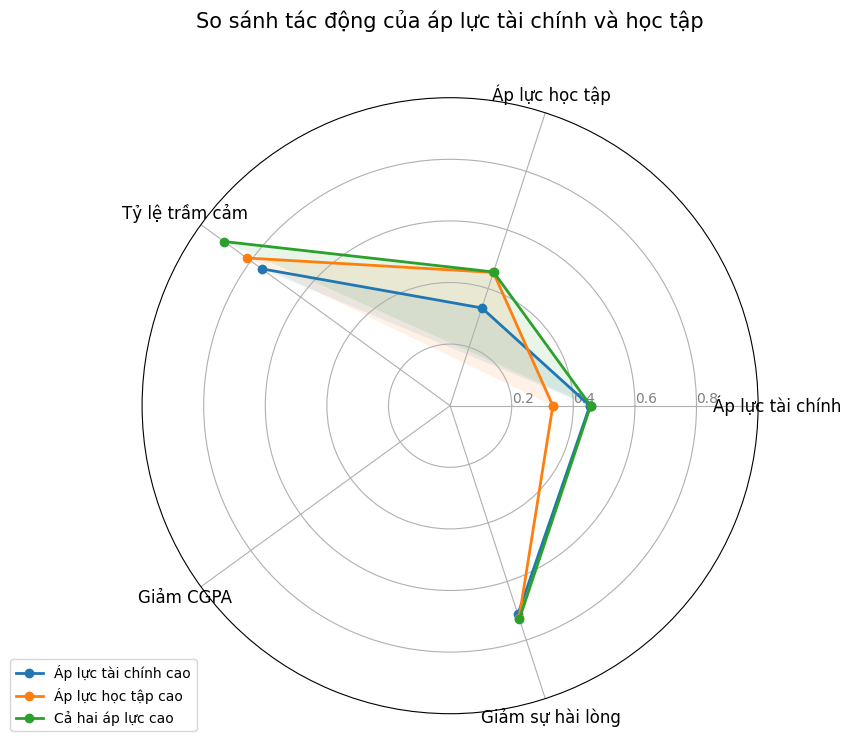

In [27]:
# 6. Biểu đồ radar thể hiện mối quan hệ giữa các yếu tố
plt.figure(figsize=(10, 8))

# Chuẩn bị dữ liệu cho biểu đồ radar
categories = ['Áp lực tài chính', 'Áp lực học tập', 'Tỷ lệ trầm cảm', 'Giảm CGPA', 'Giảm sự hài lòng']

# Nhóm có áp lực tài chính cao
high_fin = [
    high_financial_stress['Financial Stress'].mean() / 10,
    high_financial_stress['Academic Pressure'].mean() / 10,
    high_financial_stress['Depression'].mean(),
    (4 - high_financial_stress['CGPA'].mean()) / 3,  # Đảo ngược CGPA để cao hơn = tệ hơn
    (10 - high_financial_stress['Study Satisfaction'].mean()) / 10  # Đảo ngược sự hài lòng
]

# Nhóm có áp lực học tập cao
high_acad = [
    high_academic_pressure['Financial Stress'].mean() / 10,
    high_academic_pressure['Academic Pressure'].mean() / 10,
    high_academic_pressure['Depression'].mean(),
    (4 - high_academic_pressure['CGPA'].mean()) / 3,
    (10 - high_academic_pressure['Study Satisfaction'].mean()) / 10
]

# Nhóm có cả hai áp lực cao
high_both = [
    high_both_stress['Financial Stress'].mean() / 10,
    high_both_stress['Academic Pressure'].mean() / 10,
    high_both_stress['Depression'].mean(),
    (4 - high_both_stress['CGPA'].mean()) / 3,
    (10 - high_both_stress['Study Satisfaction'].mean()) / 10
]

# Thiết lập biểu đồ radar
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Đóng vòng tròn

# Mở rộng giá trị cho radar
high_fin += high_fin[:1]
high_acad += high_acad[:1]
high_both += high_both[:1]

# Vẽ biểu đồ
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, size=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color='grey', size=10)
plt.ylim(0, 1)

ax.plot(angles, high_fin, 'o-', linewidth=2, label='Áp lực tài chính cao')
ax.fill(angles, high_fin, alpha=0.1)
ax.plot(angles, high_acad, 'o-', linewidth=2, label='Áp lực học tập cao')
ax.fill(angles, high_acad, alpha=0.1)
ax.plot(angles, high_both, 'o-', linewidth=2, label='Cả hai áp lực cao')
ax.fill(angles, high_both, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('So sánh tác động của áp lực tài chính và học tập', size=15, y=1.1)
plt.grid(True)
plt.show()

- Thuộc tính sử dụng: `Financial Stress`, `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ radar so sánh 3 nhóm sinh viên:

        - Áp lực tài chính cao

        - Áp lực học tập cao

        - Cả hai áp lực cao

    - Các tiêu chí so sánh gồm:

        - Mức độ áp lực tài chính

        - Mức độ áp lực học tập

        - Tỷ lệ trầm cảm

        - Mức độ giảm CGPA (điểm trung bình tích lũy)

        - Mức độ giảm sự hài lòng

|Tiêu chí	|Áp lực tài chính cao	|Áp lực học tập cao	|Cả hai áp lực cao|
| --------- | --------------------- | ----------------- | --------------- |
|Áp lực tài chính	|~0.42	|~0.30	|~0.42|
|Áp lực học tập	|~0.30	|~0.42	|~0.42|
|Tỷ lệ trầm cảm	|~0.76	|~0.82	|~0.91|
|Giảm CGPA	|Rất thấp	|Rất thấp	|Rất thấp|
|Giảm sự hài lòng	|~0.68	|~0.70	|~0.70|

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng được ChatGPT search, ta thấy rằng áp lực tài chính là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, phần lớn dưới 25 tuổi, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về điểm trầm cảm trung bình theo thời lượng ngủ.

#### 🧠 **Phân tích sâu về mối liên hệ giữa áp lực tài chính và trầm cảm**

#####  ❓  **1. Mức độ áp lực tài chính và áp lực học tập của sinh viên có liên quan với nhau như thế nào?**

- Cụm đông nhất:

    - Mức 5 tài chính - Mức 5 học tập là ô có số lượng cao nhất (1918 sinh viên).

    - Cho thấy rằng sinh viên bị áp lực tài chính cao thường đồng thời chịu áp lực học tập cao.

- Xu hướng tổng thể:

    - Khi mức độ áp lực tài chính tăng từ 1 → 5, số lượng sinh viên có áp lực học tập cao (mức 4-5) cũng tăng.

    - Đặc biệt, ở mức áp lực tài chính 4 và 5, phần lớn sinh viên tập trung tại các mức học tập từ 3 đến 5.

- Điểm thú vị:

    - Ngay cả những sinh viên với áp lực tài chính thấp (mức 1-2), vẫn có khá nhiều người đối diện với áp lực học tập cao (mức 4-5).

    - Điều này cho thấy áp lực học tập không chỉ phụ thuộc vào tài chính, mà còn liên quan tới những yếu tố khác (mục tiêu học tập, kỳ vọng bản thân, môi trường cạnh tranh...).

- Mức áp lực học tập 3:

    - Ở tất cả các mức tài chính, áp lực học tập mức 3 đều có số lượng sinh viên khá cao → mức học tập trung bình phổ biến rộng rãi.

- Ý nghĩa thực tiễn:

    - Áp lực tài chính và áp lực học tập có tương quan thuận: Một sinh viên chịu áp lực tài chính cao có nguy cơ cao hơn chịu thêm áp lực học tập.

    - Can thiệp tài chính (học bổng, hỗ trợ chi phí) không chỉ giúp giảm stress tài chính, mà còn gián tiếp giảm áp lực học tập.

    - Chính sách hỗ trợ học tập nên ưu tiên nhóm có áp lực tài chính cao, vì họ chịu gánh nặng kép.

#####  ⚠️  **2. Mức độ áp lực tài chính và áp lực học tập ảnh hưởng như thế nào đến tỷ lệ trầm cảm của sinh viên?**

- Cụm nguy hiểm nhất:

    - Mức 5 tài chính - mức 5 học tập có tỷ lệ trầm cảm lên tới 95%.

    - Điều này cho thấy nhóm sinh viên gánh áp lực kép cực đại đang rơi vào tình trạng nguy cơ trầm cảm cực kỳ cao.

- Xu hướng tổng thể:

    - Tỷ lệ trầm cảm tăng đều theo cả 2 chiều:

        - Áp lực tài chính tăng → trầm cảm tăng.

        - Áp lực học tập tăng → trầm cảm tăng.

    - Sự gia tăng mang tính cộng hưởng, khi cả hai áp lực đều cao thì tỷ lệ trầm cảm vượt mốc 80-90%.

- Điểm cần chú ý:

    - Ngay cả khi áp lực tài chính thấp (mức 1-2), nếu áp lực học tập cao (mức 4-5), tỷ lệ trầm cảm cũng lên đến 65-77%.

    - Điều này chỉ ra rằng áp lực học tập một mình cũng đủ mạnh để gây trầm cảm, không cần thêm yếu tố tài chính.

- Dữ liệu bất thường:

    - Ở áp lực tài chính 4 - học tập 1, tỷ lệ trầm cảm đạt 100%.

    - Khả năng đây là do số lượng mẫu nhỏ ở ô đó (cần kiểm tra kỹ dữ liệu thực tế).

- Ý nghĩa thực tiễn:

    - Nhóm nguy cơ cao nhất: Sinh viên có áp lực tài chính và học tập đồng thời cao (4-5).

    - Ưu tiên can thiệp:

        - Các chương trình hỗ trợ tài chính và tư vấn học tập cần đồng bộ.

        - Không chỉ hỗ trợ tài chính đơn lẻ, mà còn giảm kỳ vọng, áp lực điểm số trong học tập.

    - Cảnh báo đặc biệt: Cần xây dựng hệ thống sàng lọc trầm cảm cho nhóm có áp lực kép này.

#####  🎓  **3. Có sự khác biệt giữa nam và nữ về cách họ trải nghiệm áp lực học tập khi áp lực tài chính tăng?**
- Tổng thể:
    
    - Cả nam và nữ đều có xu hướng áp lực học tập tăng dần theo mức độ áp lực tài chính.

- So sánh giới tính:

    - Ở mọi mức độ áp lực tài chính, nữ giới thường có mức áp lực học tập trung bình cao hơn nam giới một chút.

    - Chênh lệch này tuy không lớn nhưng nhất quán qua các mức.

- Điểm nổi bật:

    - Khi áp lực tài chính ở mức cao nhất (5/5), áp lực học tập của nữ (3.47) cao hơn nam (3.38).

    - Mức chênh lệch lớn nhất xuất hiện ở mức áp lực tài chính cao (5), nhỏ nhất ở mức thấp (1).

- Ý nghĩa thực tiễn:

    - Áp lực tài chính càng cao thì áp lực học tập cảm nhận cũng tăng, ở cả nam và nữ.

    - Nữ giới có thể nhạy cảm hơn với áp lực tài chính trong bối cảnh học tập.

    - Các chính sách hỗ trợ tài chính, giảm bớt lo âu về kinh tế có thể giúp giảm bớt áp lực học tập, đặc biệt đối với nữ sinh.

#####  💥  **4. Mức độ áp lực tài chính và học tập thay đổi như thế nào theo độ tuổi?**
- Tổng thể:

    - Cả áp lực tài chính và học tập đều có xu hướng giảm dần theo độ tuổi.

    - So sánh giữa áp lực tài chính và học tập:

    - Nhóm tuổi 18–20 có áp lực học tập cao hơn áp lực tài chính.

    - Từ 21–26 tuổi, áp lực tài chính cao hơn hoặc ngang bằng áp lực học tập.

    - Từ 27 tuổi trở đi, áp lực học tập lại nhỉnh hơn áp lực tài chính một chút.

- Điểm nổi bật:

    - Nhóm 18–20 tuổi có mức áp lực học tập cao nhất (~3.40).

    - Nhóm 31–35 tuổi có cả áp lực tài chính và học tập thấp nhất (~2.95–2.98).

- Ý nghĩa thực tiễn:

    - Sinh viên/ người trẻ 18–20 tuổi có thể chịu áp lực học tập nhiều nhất, do đang trong giai đoạn học tập cao độ (đại học, học nghề...).

    - Khi lớn tuổi hơn, áp lực tài chính giảm, có thể do sự ổn định hơn về nghề nghiệp và thu nhập.

    - Áp lực học tập giảm dần, nhưng vẫn hiện diện ở một mức độ nhất định ở mọi nhóm tuổi, cho thấy học tập có thể kéo dài cả sau tuổi 30 (học cao học, chứng chỉ chuyên môn, v.v.).

#####  ⏱️  **5. Áp lực cao có ảnh hưởng đến điểm trung bình (CGPA) của sinh viên không? Áp lực tài chính và học tập có liên quan đến tỷ lệ trầm cảm không?**
- Tình trạng áp lực:

    - Gần 45% sinh viên đang chịu áp lực tài chính cao.

    - Khoảng 41% sinh viên chịu áp lực học tập cao.

    - Khoảng 1/5 sinh viên (20.63%) chịu cả hai loại áp lực cao.

- Tình trạng trầm cảm:

    - Tỷ lệ trầm cảm chung là 58.55% – khá cao.

    - Ở nhóm chịu áp lực tài chính cao, tỷ lệ trầm cảm tăng mạnh lên 75.63%.

    - Ở nhóm áp lực học tập cao, tỷ lệ trầm cảm còn cao hơn (81.61%).

    - Đáng chú ý, sinh viên chịu cả hai loại áp lực cao có tỷ lệ trầm cảm rất cao (90.68%), gần như 9/10.

- Thành tích học tập (CGPA):

    - CGPA trung bình toàn bộ sinh viên là 7.66.

    - CGPA của các nhóm áp lực cao dao động từ 7.62 đến 7.67, không khác biệt rõ rệt so với trung bình toàn bộ.

    - Điều này cho thấy áp lực cao không làm giảm đáng kể CGPA, dù có ảnh hưởng mạnh đến sức khỏe tâm thần.

- Ý nghĩa thực tiễn:

    - Áp lực tài chính và học tập đều liên quan chặt chẽ đến nguy cơ trầm cảm ở sinh viên.

    - Sinh viên đồng thời chịu hai loại áp lực đặc biệt cần được chú ý và hỗ trợ tâm lý.

    - Tuy nhiên, điểm số học tập (CGPA) lại không phản ánh rõ ràng gánh nặng tâm lý, cảnh báo nguy cơ "hiệu suất cao nhưng sức khỏe tâm thần thấp".

    - Cần các chương trình can thiệp hỗ trợ sức khỏe tinh thần ngay cả với sinh viên có kết quả học tập tốt.

#####  🔺  **6.  Sinh viên chịu đồng thời hai áp lực có mức độ tổn thương tâm lý lớn hơn so với chỉ một áp lực không?**
- Áp lực:

    - Nhóm áp lực tài chính cao và cả hai áp lực có mức áp lực tài chính tương đương (~0.42).

    - Nhóm áp lực học tập cao và cả hai áp lực có mức áp lực học tập cao tương đương (~0.42).

- Tỷ lệ trầm cảm:

    - Nhóm cả hai áp lực cao có tỷ lệ trầm cảm cao nhất (~0.91).

    - Áp lực học tập cao (~0.82) dẫn đến tỷ lệ trầm cảm cao hơn so với áp lực tài chính cao (~0.76).

- Giảm CGPA:

    - Tác động tới CGPA rất nhỏ ở tất cả các nhóm — phù hợp với thống kê trước đó.

- Giảm sự hài lòng:

    - Tất cả các nhóm đều ghi nhận mức giảm sự hài lòng tương đối cao (~0.68-0.70).

- Ý nghĩa thực tiễn:

    - Áp lực kép (tài chính + học tập) làm tăng mạnh nguy cơ trầm cảm và giảm sự hài lòng.

    - Áp lực học tập có vẻ tác động tiêu cực nhiều hơn so với áp lực tài chính, xét riêng biệt.

    - CGPA không bị ảnh hưởng mạnh, cho thấy nỗ lực "cố gắng duy trì thành tích" của sinh viên dù tâm lý bị tổn thương.

#####  ✅  **Kết luận và gợi ý hướng giải pháp**

>- Áp lực tài chính là vấn đề cấp thiết nhất
>
>    - Gần 45% sinh viên báo cáo mức áp lực tài chính cao (≥4), chiếm  tỷ lệ cao hơn áp lực học tập (41%).
>
>    - Đây là yếu tố cần ưu tiên can thiệp về mặt tài chính (học bổng, hỗ trợ chi phí) để giảm gánh nặng kinh tế cho sinh viên.
>
>- Áp lực học tập cũng là tác nhân mạnh mẽ gây trầm cảm
>
>    - Mặc dù phân bố áp lực học tập có dạng chuông, song nhóm chịu mức 4–5 vẫn chiếm tỷ lệ đáng kể.
>
>    - Tỷ lệ trầm cảm ở nhóm áp lực học tập cao (81.6%) cao hơn nhóm áp lực tài chính cao (75.6%), cho thấy áp lực học tập đơn lẻ đã đủ sức ảnh hưởng mạnh đến sức khỏe tâm thần.
>
>- Áp lực kép (tài chính + học tập) dẫn đến rủi ro trầm cảm cực đại
>
>    - Sinh viên chịu đồng thời hai áp lực cao có tỷ lệ trầm cảm lên đến 90.7%, vượt xa các nhóm đơn lẻ.
>
>    - Họ cũng ghi nhận mức giảm sự hài lòng cá nhân cao nhất, mặc dù CGPA không biến động đáng kể.
>
>- CGPA không phải chỉ số phản ánh áp lực tâm lý
>
>    - Điểm trung bình (CGPA) của nhóm áp lực cao vẫn tương đương hoặc nhỉnh hơn nhẹ so với toàn bộ sinh viên.
>
>    - Sinh viên có thể “gồng” để duy trì thành tích học tập, trong khi nội tại sức khỏe tâm thần đang bị tổn hại sâu sắc.
>
>- Giới tính và tuổi tác định hình trải nghiệm áp lực
>
>    - Nữ giới thường cảm nhận áp lực học tập cao hơn nam ở cùng mức áp lực tài chính, đặc biệt ở mức cực đại (5/5).
>
>    - Nhóm 18–20 tuổi chịu áp lực học tập mạnh nhất, trong khi cả hai loại áp lực đều giảm dần khi tuổi tăng lên (31–35 tuổi ghi nhận áp lực thấp nhất).
>
>- Giấc ngủ không liên quan rõ ràng đến áp lực tài chính
>
>    - Mức áp lực tài chính trung bình khá đồng đều (~3.1–3.2) ở mọi nhóm thời gian ngủ, cho thấy cần kết hợp thêm các yếu tố khác (stress học tập, sức khỏe tinh thần) khi xem xét ảnh hưởng của giấc ngủ lên căng thẳng.